In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [90]:
# Generate a random smooth boundary function
def GetRandF(n_order):
    p = np.random.randn(n_order,2)
    def F(x):
        y = np.zeros(x.shape)
        for i in range(n_order):
            y += (p[i,0] * np.cos(i*np.pi*x) + p[i,1] * np.sin(i*np.pi*x))/(i+1)
        return y
    return F

# Generate discontinuous boundary function
def GetRandF_disc(n_order):
    p = np.random.randn(n_order)
    px0 = np.random.rand(n_order)*4-2
    p_inv = np.random.choice([0,1],n_order)
    def F(x):
        y = np.zeros(x.shape)
        for i in range(n_order):
            y += p[i] * (p_inv[i] * np.heaviside(x-px0[i],0.5) + (1-p_inv[i]) * (1-np.heaviside(x-px0[i],0.5)))
        return y
    return F

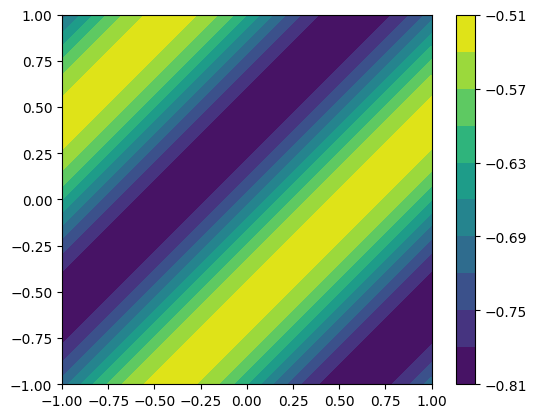

In [4]:
c = 1
n_order = 2
x = np.linspace(-1,1,38)
X,Y = np.meshgrid(x,x)
eta = X-c*Y
F = GetRandF(n_order)
u = F(eta)
plt.contourf(X,Y,u,10)
plt.gca().set_aspect('equal')
plt.colorbar()

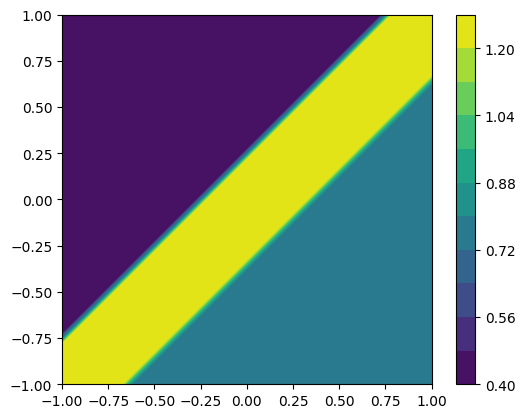

In [100]:
c = 1
n_order = 2
x = np.linspace(-1,1,38)
X,Y = np.meshgrid(x,x)
eta = X-c*Y
F = GetRandF_disc(n_order)
u = F(eta)
plt.contourf(X,Y,u,10)
plt.gca().set_aspect('equal')
plt.colorbar()

In [183]:
n_data = 2000
c = 1
n_order = 2
x = np.linspace(-1ß,1,38)
X,Y = np.meshgrid(x,y)
eta = X-c*Y
u_data = np.zeros((n_data,38,38))

for i in tqdm(range(n_data)):
    F = GetRandF(n_order)
    u_data[i,:,:] = F(eta)
    

100%|██████████| 2000/2000 [00:00<00:00, 26885.70it/s]


In [185]:
np.save('LinearAdvection.npy',u_data)

In [104]:
n_data = 2000
c = 1
n_order = 2
x = np.linspace(-1,1,38)
X,Y = np.meshgrid(x,x)
eta = X-c*Y
u_data = np.zeros((n_data,38,38))

for i in tqdm(range(n_data)):
    F = GetRandF_disc(n_order)
    u_data[i,:,:] = F(eta)

100%|██████████| 2000/2000 [00:00<00:00, 26462.65it/s]


In [105]:
np.save('TrainingData/LinearAdvectionDisc.npy',u_data)

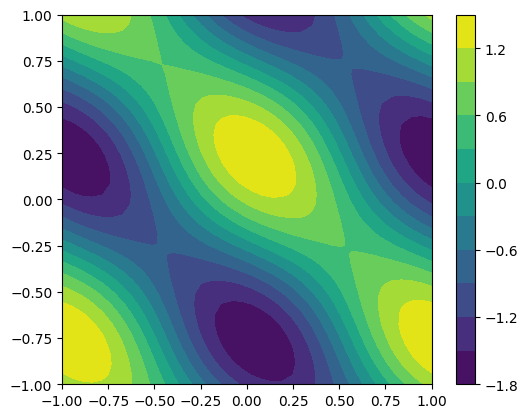

In [153]:
c = 1
n_order = 2
x = np.linspace(-1,1,38)
X,Y = np.meshgrid(x,y)
eta = X-c*Y
xi = X+c*Y
F = GetRandF(n_order)
G = GetRandF(n_order)
u = F(eta)+G(xi)
plt.contourf(X,Y,u,10)
plt.gca().set_aspect('equal')
plt.colorbar()